**Luisa María Morales Sánchez**

1002633805

# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [27]:
#Librerias
import numpy as np
import scipy as sc
import matplotlib.pylab as plt
from scipy import optimize

***Punto 1 y 2***

In [28]:
#Parametros iniciales
theta = np.deg2rad(45)
v0 = 55 #m/s
v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
b = 0.005
g = 9.8 #m/s²
t = np.linspace(0,10,100)

def posX(t,v0x,b):
  b = 0.005
  x = (v0x/b)*(1 - np.exp(-b*t))
  return x

def posY(t,b,v0y,g):
  b = 0.005
  y = (1/b)*((g/b)+v0y)*(1-np.exp(-b*t))  - (g/b)*t
  return y

x=posX(t,v0x,b)
y=posY(t,b,v0y,g)

In [ ]:
R = x
def maxh(R,v0x,v0y,b,g):
  b = 0.005
  y1 = (g/b +v0y)*R/v0x
  y2 = (g/b**2)*np.log(1-((R*b)/v0x))
  #y = y1 + y2
  return y1+y2

Y = maxh(R,v0x,v0y,b,g)


In [47]:
#Alcanze maximo
f = lambda x: ((g/b +v0y)*x/v0x)+ ((g/b**2)*np.log(1-((x*b)/v0x)))
#Raiz para la gráfica x vs y
root = optimize.bisect(f,250,350)
print(f'La raiz de la ecuacion parametrica del proyectil es: {root}')

La raiz de la ecuacion parametrica del proyectil es: 300.69207669319127


***Punto 3***

In [44]:
def t_vuelo(b,root,v0x):
  t = -(1/b)*np.log(1-((root*b)/v0x))
  return t
tv = t_vuelo(b,root,v0x)
t1 = np.linspace(0,tv,100)
tv

7.885101833164226

***Punto 4. Gráficas***

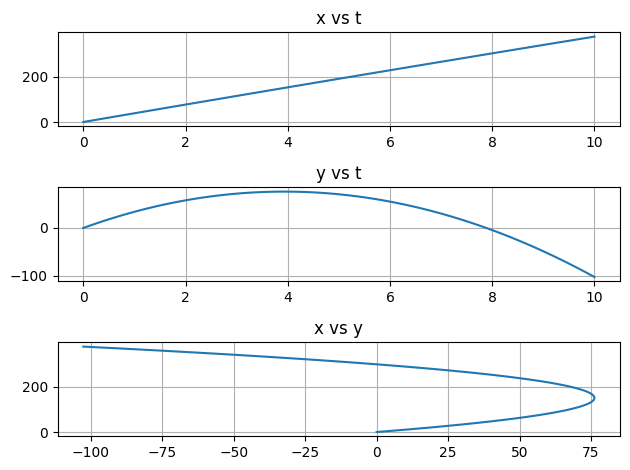

In [105]:
fig,axs =plt.subplots(3)
axs[0].plot(t, x)
axs[0].set_title('x vs t')
axs[0].grid()

axs[1].plot(t, y)
axs[1].set_title('y vs t')
axs[1].grid()

axs[2].plot(y, x)
axs[2].set_title('x vs y')
axs[2].grid()

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(t, y,label='Trayectoria del lanzamiento')
plt.xlabel('Distancia (m)')
plt.ylabel('Altura (m)')
plt.title('Movimiento Parabólico')
plt.legend()
plt.grid()

***Punto 5***

In [174]:
v_0 = 40 #m/s
b1 = 0.009
g = 9.8 #m/s²

In [227]:
th = np.deg2rad(20)
t2 = np.linspace(0,20,17)
theta_= np.arange(0, 85, 5)
theta_= np.deg2rad(theta_)

def v0X(theta_):
  v0_x = v0*np.cos(theta_)
  return v0_x
def v0Y(theta_):
  v0_y = v0*np.sin(theta_)
  return v0_y

x1 = (v0X(theta_)/b1)*(1 - np.exp(-b1*t2))

G = lambda x: ((g/b1 +v0Y(theta_))*x/v0X(theta_))+ ((g/b1**2)*np.log(1-((x*b1)/v0X(theta_))))
G(x1)

array([   0.        ,   -1.66924104,   -6.78658299,  -15.64688584,
        -28.71230762,  -46.60257688,  -70.08361592, -100.0546524 ,
       -137.53397102, -183.6434684 , -239.59218491, -306.65899532,
       -386.17464691, -479.50333842, -588.02403596, -713.111723  ,
       -856.11878047])

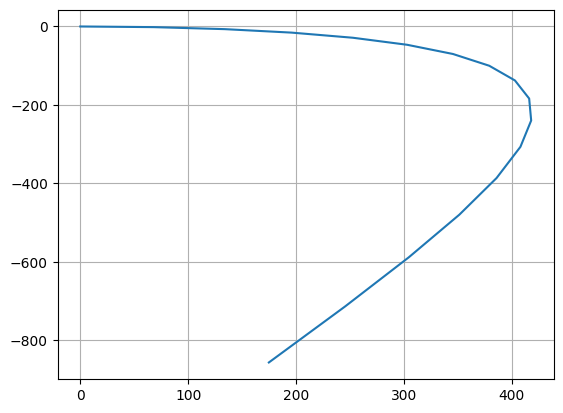

In [228]:
plt.plot(x1,G(x1))
plt.grid()

In [ ]:
for i in range(0,len(G(x1))):
  print(G(x1)[i])